# Criando os nomes

In [1]:
import pandas as pd

In [2]:
# https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f

In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
frames = [ nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
17,LUCIANA
125,BENEDITA
26,RITA
92,VALERIA
28,SONIA


# Incluindo ID dos alunos

In [8]:
import numpy as np

In [9]:
np.random.seed(123)

In [10]:
total_alunos = len(nomes)
total_alunos

400

In [11]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [12]:
nomes.sample(3)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382


In [13]:
dominios = [ '@dominiodoemail.com.br', '@servicodoemail.com']

In [14]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(3)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(3)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br


# Criando tabela Cursos

In [18]:
# !pip3 install xml

In [19]:
import html5lib

In [20]:
cursos = pd.read_html("http://tabela-cursos.herokuapp.com/index.html")
cursos = cursos[0]

In [21]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [22]:
cursos.rename(columns = { 'Nome do curso': 'nome_do_curso' }, inplace = True)

In [23]:
cursos['id'] = cursos.index + 1

In [24]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [25]:
cursos = cursos.set_index('id')

In [26]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [27]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [28]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5 ).astype(int)

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [30]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [31]:
import seaborn as sns

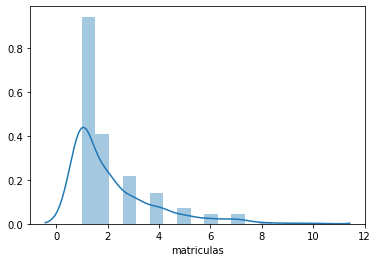

In [32]:
sns.distplot(nomes.matriculas)

In [33]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

# Selecionando cursos

In [34]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [35]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [36]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,6
2,43,16
3,43,18
4,43,11


In [38]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = { 'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,42,TDD com Java


In [44]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = { 'id_aluno': 'quantidade_de_alunos'})

In [45]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


# Saida em diferentes formatos

In [46]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web


In [47]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [50]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [51]:
matriculas_por_curso.to_html('matriculas_por_curso.html')

# Criando o banco SQL

In [52]:
!pip install sqlalchemy

In [53]:
from sqlalchemy import create_engine, MetaData, Table

In [54]:
engine = create_engine('sqlite:///:memory:')

In [55]:
engine

Engine(sqlite:///:memory:)

In [56]:
type(engine)

sqlalchemy.engine.base.Engine

In [57]:
matriculas_por_curso.to_sql('matriculas', engine)

In [58]:
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [59]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [60]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,4,Java para Web
1,5,17,Cursos de Python
2,8,16,Novas integrações com Java
3,13,17,Persistência com .NET
4,17,13,Internet das coisas


In [62]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [66]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [67]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
11,Hardware básico,87
17,Boas práticas em Java,81


# Escrevendo no banco

In [68]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [69]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [70]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


In [72]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,6
2,43,16
3,43,18
4,43,11
...,...,...
854,383,11
855,366,11
856,366,1
857,366,9


In [76]:
id_curso = 16
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
2,43,16
21,174,16
25,34,16
38,200,16
41,80,16
...,...,...
813,69,16
819,254,16
837,58,16
845,84,16


In [77]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
52,LUZIA,276,@servicodoemail.com,luzia@servicodoemail.com,1
115,MILTON,104,@servicodoemail.com,milton@servicodoemail.com,1
122,ADAO,234,@dominiodoemail.com.br,adao@dominiodoemail.com.br,1


In [78]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
1,16,SABRINA,@dominiodoemail.com.br,sabrina@dominiodoemail.com.br,3
3,16,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,1
6,16,CINTIA,@dominiodoemail.com.br,cintia@dominiodoemail.com.br,3
7,16,SOLANGE,@dominiodoemail.com.br,solange@dominiodoemail.com.br,1
12,16,RITA,@dominiodoemail.com.br,rita@dominiodoemail.com.br,1
...,...,...,...,...,...
375,16,MARA,@servicodoemail.com,mara@servicodoemail.com,3
377,16,VALERIA,@dominiodoemail.com.br,valeria@dominiodoemail.com.br,6
387,16,ROSILENE,@servicodoemail.com,rosilene@servicodoemail.com,4


In [79]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
1       SABRINA
3      VALDEMIR
6        CINTIA
7       SOLANGE
12         RITA
         ...   
375        MARA
377     VALERIA
387    ROSILENE
389     LIDIANE
395    MAURICIO
Name: nome, Length: 74, dtype: object

In [80]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
1,SABRINA
3,VALDEMIR
6,CINTIA
7,SOLANGE
12,RITA
...,...
375,MARA
377,VALERIA
387,ROSILENE


In [82]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [86]:
nome_curso = nome_curso.nome_do_curso
nome_curso

AttributeError: 'str' object has no attribute 'nome_do_curso'

In [87]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [88]:
proxima_turma

,nome
id_aluno,
1,SABRINA
3,VALDEMIR
6,CINTIA
7,SOLANGE
12,RITA
...,...
375,MARA
377,VALERIA
387,ROSILENE


In [90]:
proxima_turma.rename( columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
1,SABRINA
3,VALDEMIR
6,CINTIA
7,SOLANGE
12,RITA
...,...
375,MARA
377,VALERIA
387,ROSILENE


In [91]:
proxima_turma.sample(3)

,nome
id_aluno,
251,MAURO
174,SANDRA
293,BRUNO


# Excel

In [93]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [94]:
pd.read_excel('proxima_turma.xlsx')

,nome
0,SABRINA
1,VALDEMIR
2,CINTIA
3,SOLANGE
4,RITA
...,...
69,MARA
70,VALERIA
71,ROSILENE
72,LIDIANE
